### Cluster Analysis



## Introduction 

#### Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group than those in other groups. In simple words, the aim is to segregate groups with similar traits and assign them into clusters.
##### In Data Science, we can use clustering analysis to gain some valuable insights from our data by seeing what groups the data points fall into when we apply a clustering algorithm. 
##### Cluster Analysis is done using two categories of methods –
##### 1.Hierarchical Cluster Analysis methods -- Agglomerative methods,Divisive methods
##### 2.Non-hierarchical Cluster Analysis --  KMeans

#### Customer segmentation is the practice of dividing a customer base into groups of individuals that are similar in specific ways relevant to marketing, such as age, gender, interests and spending habits.
Customer segmentation relies on identifying key differentiators that divide customers into groups that can be targeted. Information such as a customers' demographics (age, race, religion, gender, family size, ethnicity, income, education level), geography (where they live and work), psychographic (social class, lifestyle and personality characteristics) and behavioral (spending, consumption, usage and desired benefits) tendencies are taken into account when determining customer segmentation practices.

#### About dataset - Mall Customer Segmentation Data
#### Details on variables
CustomerID: Unique ID assigned to the customer.

Gender: Gender of the customer.

Age: Age of the customer.

Annual Income (k$): Annual Income of the customer.

Spending Score (1-100): Score assigned by the mall based on customer behavior and spending nature.

In [1]:
#Importing important Lib : os, pandas and numpy
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.chdir("C:\\Users\\hp1\\Desktop\\Datasets")
mallcust = pd.read_csv("Mall_Customers.csv") # reading the dataset.

### DATA EXPLORATION

In [3]:
mallcust.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
64,65,Male,63,48,51
118,119,Female,51,67,43
196,197,Female,45,126,28
47,48,Female,27,40,47
25,26,Male,29,28,82


In [4]:
mallcust.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
mallcust.isnull().any() # checking for null values.

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

### Plotting distribution for variables.

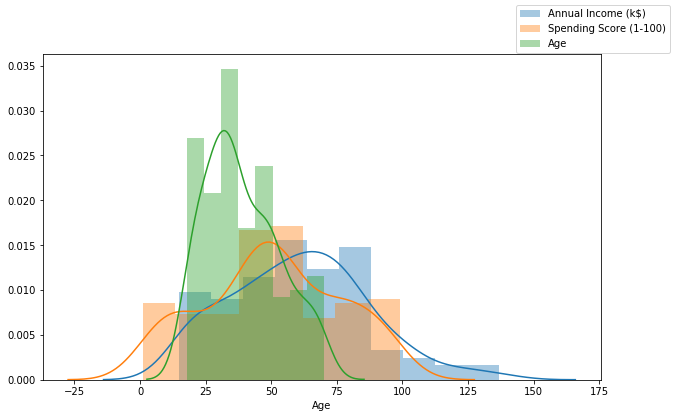

In [6]:
fig = plt.figure(figsize=(10,6))
sns.distplot(mallcust['Annual Income (k$)'],)
sns.distplot(mallcust['Spending Score (1-100)'])
sns.distplot(mallcust['Age'])
fig.legend(labels=['Annual Income (k$)','Spending Score (1-100)','Age'])
plt.show()

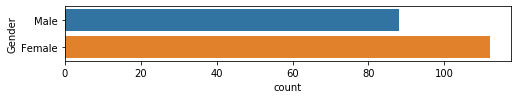

In [7]:
plt.figure(1 , figsize = (8, 1))
sns.countplot(y = 'Gender' , data = mallcust)
plt.show()

### Plotting the variables Age  and Annual Income in Scatter plot

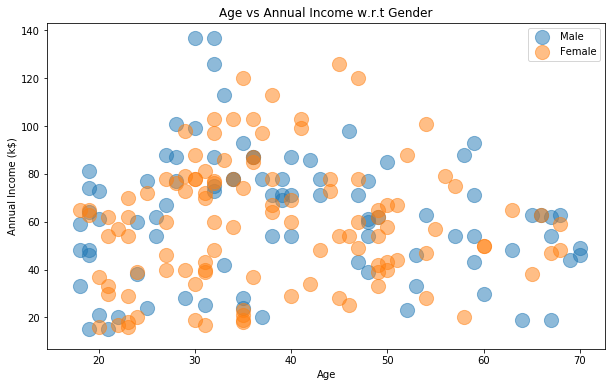

In [8]:
plt.figure(figsize = (10 , 6))
for i in ['Male' , 'Female']:
    plt.scatter(x='Age',y='Annual Income (k$)',data=mallcust[mallcust['Gender']==i],
                label=i,s=200,alpha=0.5)

plt.xlabel('Age')
plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')

plt.legend()
plt.show()

Plotted the above scatter plot to differentiate between Male and Female with there Age and Annual income. We do not observe major difference between Male and Female as they are scatterd homogeneously.

### Plotting the variables Annual Income and Spending score in Scatter plot

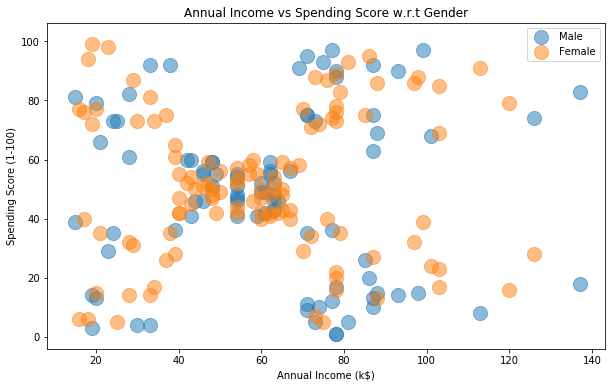

In [9]:
plt.figure(figsize = (10 , 6))
for i in ['Male' , 'Female']:
    plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)',data = mallcust[mallcust['Gender'] == i],
                s=200,alpha=0.5,label=i)
    
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

Plotted the above scatter plot to differentiate between Male and Female with there Spending Score and Annual income. We do  observe different groups in the scatter matrix.

In [10]:
#changing Column - Gender from categorical Male and Female to numerical 1 and 0 respectively.
a = list()
for i in mallcust.Gender:
    if i == 'Male':
        a.append(1)
    else:
        a.append(0)     
gender_mod = pd.Series(a)
mallcust["Gender_mod"]= gender_mod # Creating new column for Gender
mallcust.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_mod
4,5,Female,31,17,40,0
66,67,Female,43,48,50,0
23,24,Male,31,25,73,1
148,149,Female,34,78,22,0
163,164,Female,31,81,93,0


In [11]:
mallcust.drop('Gender', axis=1, inplace=True) # dropping the column Gender
mallcust.head(5) 

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_mod
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [12]:
mallcust_scaled = mallcust.apply(lambda x: (x - np.mean(x)) / np.std(x)) # Normalizing the variables.

In [13]:
mallcust_scaled.sample(5)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_mod
123,0.407037,0.010765,0.322150,1.583920,1.128152
122,0.389716,0.082532,0.322150,0.302808,-0.886405
127,0.476320,0.082532,0.398489,1.739206,1.128152
74,-0.441678,1.446099,-0.250391,-0.124229,1.128152
69,-0.528282,-0.491602,-0.479408,-0.124229,-0.886405


### Plotting a Dendrogram

#### Hierarchical clustering, as the name suggests is an algorithm that builds hierarchy of clusters. This algorithm starts with all the data points assigned to a cluster of their own. Then two nearest clusters are merged into the same cluster. In the end, this algorithm terminates when there is only a single cluster left.

#### The results of hierarchical clustering can be shown using dendrogram. The dendrogram can be interpreted as:

In [14]:
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage

In [15]:
Z = linkage(mallcust_scaled, 'complete')

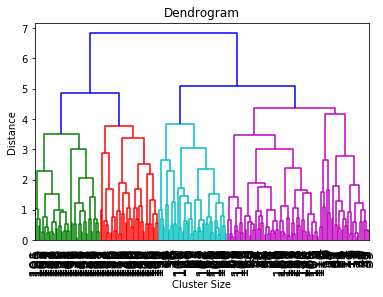

In [16]:
dendrogram(Z,leaf_rotation=90, leaf_font_size=15.)
plt.title("Dendrogram")
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

### Truncated Dendogram

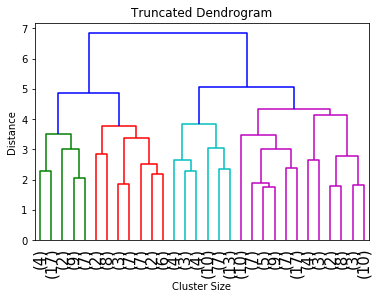

In [17]:
dendrogram(Z,truncate_mode='lastp',p=30,leaf_rotation=90, leaf_font_size=15.)
plt.title("Truncated Dendrogram")
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

In [18]:
mallcust.drop("CustomerID", axis=1, inplace=True)

In [19]:
mallcust_scaled.drop("CustomerID", axis=1, inplace=True)

In [20]:
mallcust_scaled.sample(5)

,Age,Annual Income (k$),Spending Score (1-100),Gender_mod
72,1.517865,-0.403069,-0.046586,-0.886405
139,-0.276302,0.512997,0.846310,-0.886405
97,-0.850435,-0.021375,-0.007764,-0.886405
74,1.446099,-0.250391,-0.124229,1.128152
120,-0.850435,0.245811,0.225165,1.128152


### Agglomerative Hierarchical Clustering

#### The agglomerative clustering is the most common type of hierarchical clustering used to group objects in clusters based on their similarity. It’s also known as AGNES (Agglomerative Nesting). The algorithm starts by treating each object as a singleton cluster. Next, pairs of clusters are successively merged until all clusters have been merged into one big cluster containing all objects. The result is a tree-based representation of the objects, named dendrogram.

In [21]:
import sklearn
from sklearn.cluster import AgglomerativeClustering

In [22]:
hclust = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
hclust.fit(mallcust_scaled)
mallcust['Groups'] = hclust.labels_
mallcust.head(10)
mallcust.groupby(['Groups']).mean()

,Age,Annual Income (k$),Spending Score (1-100),Gender_mod
Groups,,,,
0,54.646154,50.615385,39.892308,0.415385
1,39.620690,89.551724,15.758621,0.620690
2,25.228571,36.714286,69.571429,0.628571
3,32.692308,86.538462,82.128205,0.461538
4,28.468750,48.906250,42.250000,0.093750


#### Interpretation :
#### Taking the inference from the above table we can say that people of age 32-33 has annual income of 86000 dollers and has spending score of 82. We can also infer that people in age group of 54-55 has annual income of 50000 dollers and has spending score of 39. Where as people with age group 39-40 has earning of 89000 dollers and has the best spending score of 15.

#### Optimal no of cluster is considered as 5 in this case.

In [23]:
clusters = pd.DataFrame()
clusters['index_of_data'] = mallcust.index.values
clusters['cluster_no'] = hclust.labels_
clusters.head()

,index_of_data,cluster_no
0,0,4
1,1,2
2,2,4
3,3,2
4,4,4


In [24]:
cluster1 = mallcust.loc[clusters[clusters['cluster_no'] == 0]['index_of_data'].values,:]
cluster2 = mallcust.loc[clusters[clusters['cluster_no'] == 1]['index_of_data'].values,:]
cluster3 = mallcust.loc[clusters[clusters['cluster_no'] == 2]['index_of_data'].values,:]
cluster4 = mallcust.loc[clusters[clusters['cluster_no'] == 3]['index_of_data'].values,:]
cluster5 = mallcust.loc[clusters[clusters['cluster_no'] == 4]['index_of_data'].values,:]

In [25]:
cluster1.describe()

,Age,Annual Income (k$),Spending Score (1-100),Gender_mod,Groups
count,65.000000,65.000000,65.000000,65.000000,65.0
mean,54.646154,50.615385,39.892308,0.415385,0.0
std,8.617625,16.493078,16.146907,0.496623,0.0
min,36.000000,19.000000,3.000000,0.000000,0.0
25%,48.000000,40.000000,32.000000,0.000000,0.0
50%,53.000000,50.000000,46.000000,0.000000,0.0
75%,63.000000,62.000000,51.000000,1.000000,0.0
max,70.000000,101.000000,60.000000,1.000000,0.0


In [34]:
cluster1.sample(4)

,Age,Annual Income (k$),Spending Score (1-100),Gender_mod,Groups
79,49,54,42,0,0
53,59,43,60,1,0
160,56,79,35,0,0
72,60,50,49,0,0


#### Interpretation :
#### We infer from Cluster 1 that people with mean age 54 has average Annual Income of 50000 dollers with a average spending score of 39.

In [36]:
cluster4.describe()

,Age,Annual Income (k$),Spending Score (1-100),Gender_mod,Groups
count,39.000000,39.000000,39.000000,39.000000,39.0
mean,32.692308,86.538462,82.128205,0.461538,3.0
std,3.728650,16.312485,9.364489,0.505035,0.0
min,27.000000,69.000000,63.000000,0.000000,3.0
25%,30.000000,75.500000,74.500000,0.000000,3.0
50%,32.000000,79.000000,83.000000,0.000000,3.0
75%,35.500000,95.000000,90.000000,1.000000,3.0
max,40.000000,137.000000,97.000000,1.000000,3.0


In [38]:
cluster4.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_mod,Groups
123,39,69,91,1,3
125,31,70,77,0,3
127,40,71,95,1,3
129,38,71,75,1,3
131,39,71,75,1,3


#### Interpretation :
#### We infer from the Cluster 4 that people with mean age 32 has average Annual Income of 86000 dollers with a mean spending score of 82.

#### And similary we can interpret for cluster 2 and cluster 3

In [41]:
cluster2.describe()

,Age,Annual Income (k$),Spending Score (1-100),Gender_mod,Groups
count,29.000000,29.000000,29.000000,29.000000,29.0
mean,39.620690,89.551724,15.758621,0.620690,1.0
std,10.648319,17.124724,9.034281,0.493804,0.0
min,19.000000,71.000000,1.000000,0.000000,1.0
25%,34.000000,78.000000,10.000000,0.000000,1.0
50%,41.000000,86.000000,15.000000,1.000000,1.0
75%,46.000000,98.000000,20.000000,1.000000,1.0
max,59.000000,137.000000,39.000000,1.000000,1.0


#### We infer from the Cluster 2 that people with mean age 40 has average Annual Income of 89000 dollers with a mean spending score of 15. People in this age group are earning more and spending less.

In [42]:
cluster3.describe()

,Age,Annual Income (k$),Spending Score (1-100),Gender_mod,Groups
count,35.000000,35.000000,35.000000,35.000000,35.0
mean,25.228571,36.714286,69.571429,0.628571,2.0
std,6.126537,16.317748,15.694296,0.490241,0.0
min,18.000000,15.000000,41.000000,0.000000,2.0
25%,20.500000,22.000000,55.500000,0.000000,2.0
50%,24.000000,33.000000,73.000000,1.000000,2.0
75%,29.500000,51.000000,80.000000,1.000000,2.0
max,40.000000,67.000000,99.000000,1.000000,2.0


#### We infer from the Cluster 3 that people with mean age 25 has average Annual Income of 36000 dollers with a mean spending score of 69.